#2. Binary classification with logistic regression

Reference: ''https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/blob/master/LogisticRegression/ML_LogisticRegression.ipynb ''

In [170]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
heart_disease_test= pd.read_csv("heart_disease_test.csv")
heart_disease_test.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [172]:
heart_disease_train=pd.read_csv("heart_disease_train.csv")
heart_disease_train.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [173]:
heart_disease_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3306 non-null   float64
 3   currentSmoker    3390 non-null   int64  
 4   cigsPerDay       3365 non-null   float64
 5   BPMeds           3348 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3346 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3374 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3075 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


In [174]:
heart_disease_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        827 non-null    float64
 3   currentSmoker    848 non-null    int64  
 4   cigsPerDay       844 non-null    float64
 5   BPMeds           837 non-null    float64
 6   prevalentStroke  848 non-null    int64  
 7   prevalentHyp     848 non-null    int64  
 8   diabetes         848 non-null    int64  
 9   totChol          842 non-null    float64
 10  sysBP            848 non-null    float64
 11  diaBP            848 non-null    float64
 12  BMI              845 non-null    float64
 13  heartRate        848 non-null    float64
 14  glucose          775 non-null    float64
 15  TenYearCHD       848 non-null    int64  
dtypes: float64(9), int64(7)
memory usage: 106.1 KB


In [175]:
heart_disease_train.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3306.000000,3390.000000,3365.000000,3348.000000,3390.000000,3390.000000,3390.000000,3346.000000,3390.000000,3390.000000,3374.000000,3389.000000,3075.000000,3390.000000
mean,0.433628,49.614159,1.981246,0.486726,8.962556,0.028375,0.004720,0.302065,0.024779,236.759713,132.126696,82.752065,25.793874,75.776335,82.023089,0.152212
std,0.495648,8.609617,1.023009,0.499897,12.030447,0.166067,0.068548,0.459221,0.155473,45.347259,22.047822,11.933836,4.045690,11.952094,23.934546,0.359280
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.500000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,82.000000,25.425000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [176]:
heart_disease_test.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,848.000000,848.000000,827.000000,848.000000,844.000000,837.000000,848.000000,848.000000,848.000000,842.000000,848.000000,848.000000,845.000000,848.000000,775.000000,848.000000
mean,0.411557,49.468160,1.969770,0.523585,9.164692,0.034648,0.010613,0.344340,0.029481,236.570071,133.254717,83.458726,25.834485,76.288915,81.743226,0.150943
std,0.492406,8.424758,1.007385,0.499738,11.475080,0.182995,0.102533,0.475433,0.169251,41.471282,21.989009,11.808590,4.217051,12.318492,24.074923,0.358205
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,92.000000,48.000000,16.750000,45.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.875000,75.500000,23.060000,67.750000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,235.000000,129.000000,82.500000,25.310000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.750000,144.500000,90.000000,27.930000,85.000000,86.000000,0.000000
max,1.000000,69.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,453.000000,215.000000,140.000000,51.280000,125.000000,325.000000,1.000000


In [177]:
heart_disease_train.isnull().sum()

,0
gender,0
age,0
education,84
currentSmoker,0
cigsPerDay,25
BPMeds,42
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,44


In [178]:
heart_disease_test.isnull().sum()

,0
gender,0
age,0
education,21
currentSmoker,0
cigsPerDay,4
BPMeds,11
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,6


In [179]:
# Train Features
X_train= heart_disease_train.drop(columns=['TenYearCHD'])
# Train Target
y_train= heart_disease_train['TenYearCHD']

In [180]:
X_train.shape

(3390, 15)

In [181]:
# Test Features
X_test= heart_disease_test.drop(columns=['TenYearCHD'])
# Test Target
y_test= heart_disease_test['TenYearCHD']

In [182]:
X_test.shape

(848, 15)

In [183]:
X_train.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [184]:
X_train['gender'].unique()

array([1, 0])

In [185]:
X_train['age'].unique()

array([63, 45, 51, 50, 60, 61, 56, 53, 55, 36, 49, 65, 42, 54, 64, 59, 38,
       37, 57, 52, 48, 39, 41, 44, 47, 43, 69, 58, 66, 46, 40, 67, 68, 34,
       62, 33, 35, 70, 32])

In [186]:
X_train['education'].unique()

array([ 1.,  3.,  2.,  4., nan])

In [187]:
X_train['currentSmoker'].unique()

array([0, 1])

In [188]:
X_train['cigsPerDay'].unique()

array([ 0.,  2., 30.,  3., 20., 15., 35., 23., 10.,  1., nan, 11., 40.,
        5.,  9., 17., 16., 43., 12., 25.,  7.,  6.,  4., 50.,  8., 60.,
       18., 70., 13., 38., 14., 45., 19.])

In [189]:
X_train['BPMeds'].unique()

array([ 0.,  1., nan])

In [190]:
X_train['prevalentStroke'].unique()

array([0, 1])

In [191]:
X_train['prevalentHyp'].unique()

array([1, 0])

In [192]:
X_train['diabetes'].unique()

array([0, 1])

In [193]:
X_train['totChol'].unique()

array([190., 162., 261., 250., 300., 168., 229., 238., 214., 254., 285.,
       174., 265., 205., 184., 243., 347., 240., 273., 216., 278., 159.,
       233., 263., 266., 255., 257., 275., 198., 173., 269., 310., 237.,
       225., 280., 161., 220., 165., 223., 286., 201., 270., 222., 197.,
       248., 239., 235., 226.,  nan, 246., 155., 232., 245., 150., 241.,
       333., 228., 256., 258., 272., 186., 354., 185., 189., 187., 230.,
       175., 282., 305., 167., 242., 172., 204., 308., 194., 320., 290.,
       262., 206., 304., 340., 210., 279., 212., 211., 288., 284., 336.,
       154., 195., 208., 170., 372., 227., 219., 234., 318., 268., 271.,
       215., 207., 277., 317., 361., 200., 152., 295., 252., 306., 218.,
       309., 179., 291., 224., 249., 260., 221., 202., 231., 113., 251.,
       144., 292., 329., 193., 192., 311., 314., 199., 276., 180., 302.,
       335., 259., 213., 274., 281., 264., 171., 181., 253., 346., 244.,
       334., 303., 267., 164., 157., 217., 209., 23

In [194]:
X_train['sysBP'].unique()

array([148. , 125. , 127. , 126. , 130. , 134. , 120. , 144. , 119. ,
       115. , 160. , 158. , 131. , 150. , 106. , 114.5, 142. , 157. ,
       146. , 123. , 205. , 120.5, 112. , 117.5, 149. , 117. , 118. ,
       113.5, 128. ,  97. , 141. , 136.5, 180. , 122. , 137. , 113. ,
       110. , 107.5, 108. , 151. , 139. , 121. , 143.5, 102. , 133.5,
       153. , 108.5, 143. , 167. , 130.5, 147. , 122.5, 118.5, 213. ,
       136. , 126.5, 164. , 133. , 166. , 129.5, 180.5, 116. , 115.5,
       124. , 135. , 147.5, 114. , 154. , 127.5, 109. , 145. , 102.5,
       142.5, 116.5, 162.5, 182. , 132. , 138. , 183. , 121.5, 129. ,
       111. ,  85. , 169. , 153.5, 107. , 161. , 132.5, 170. , 146.5,
       152. , 140. , 131.5, 162. , 156.5, 177. , 181. , 207. ,  90. ,
       164.5, 101. , 165. , 141.5, 163. , 123.5, 112.5, 105. ,  93.5,
       206. , 103.5,  96.5, 155. , 124.5, 193. , 184.5, 199. , 128.5,
       134.5, 159. , 161.5, 138.5, 190. , 151.5,  97.5, 103. , 100. ,
       175.5, 197. ,

In [195]:
X_train['diaBP'].unique()

array([ 90. ,  89. ,  81. ,  89.5,  80. ,  86.5,  91. ,  78. ,  92. ,
        98. ,  86. ,  77.5,  73. ,  76. ,  73.5,  92.5,  93. ,  69. ,
        71. ,  85. ,  75.5,  64. ,  83. ,  85.5, 114. ,  84. ,  97. ,
        79. ,  67. ,  72.5,  63.5, 109. ,  74.5,  82.5, 108. ,  96. ,
        96.5,  77. ,  74. ,  98.5,  82. , 133. ,  87. ,  67.5,  94.5,
        88. , 106.5,  78.5,  65. ,  72. ,  94. ,  75. ,  70. ,  93.5,
       101. ,  95. ,  66. ,  59.5,  79.5,  55. , 104. ,  87.5, 100. ,
       110. ,  57. , 122.5,  62. ,  81.5,  63. , 111. , 105. ,  58. ,
        57.5,  83.5, 102. ,  66.5,  84.5, 110.5,  99. ,  68. , 103. ,
        62.5, 113. , 118. , 112. ,  80.5, 107. ,  99.5, 106. ,  71.5,
       128. ,  59. ,  60. ,  76.5,  95.5,  70.5, 142.5, 132. ,  88.5,
        65.5,  97.5,  68.5, 130. , 108.5, 124. , 100.5,  61. , 101.5,
       115. ,  64.5,  61.5, 123. , 120. , 117. ,  50. , 105.5, 102.5,
       107.5,  69.5, 135. ,  91.5, 125. , 104.5, 119. ,  53. ,  52. ,
        90.5, 103.5,

In [196]:
X_train['BMI'].unique()

array([27.13, 27.98, 20.24, ..., 30.57, 30.61, 40.51])

In [197]:
X_train['heartRate'].unique()

array([ 72.,  85.,  75.,  90.,  96.,  70.,  80.,  60.,  66.,  65.,  88.,
        82.,  86.,  50., 120.,  68.,  73.,  52., 105.,  62.,  76.,  92.,
        67.,  78.,  83.,  94.,  63., 100.,  84.,  58.,  48.,  55.,  79.,
        71.,  64.,  56.,  69., 106.,  53.,  54.,  77.,  61., 110.,  81.,
        95.,  74.,  93.,  59.,  89.,  57., 108.,  99., 125.,  87.,  98.,
        45., 130.,  44., 122.,  91., 103.,  97.,  47., 143., 104., 107.,
       112., 102., 115., 140.,  51.,  nan])

In [198]:
X_train['glucose'].unique()

array([ 86.,  83.,  96.,  92.,  81.,  60.,  82.,  75., 292.,  80.,  88.,
        64., 107.,  87.,  59.,  67.,  70.,  84.,  78.,  66.,  nan,  72.,
        79., 118.,  76.,  61.,  90.,  74., 104.,  97., 103.,  57., 126.,
        73.,  85.,  62.,  68., 125.,  77.,  89.,  58.,  69.,  65.,  71.,
        98.,  95., 156.,  50., 110., 120., 112.,  55.,  93., 106.,  54.,
        99., 172.,  63., 102., 123., 115.,  94., 129., 100.,  91., 147.,
       170., 142.,  40.,  53., 206., 109., 113.,  47., 130., 215., 108.,
       155., 105.,  45., 348., 122., 127., 160., 297., 114., 370., 193.,
       145., 116., 223., 117.,  44., 216., 101., 386., 183.,  56., 163.,
       137.,  43., 332., 135., 150.,  48., 191., 119., 132., 143., 111.,
       268., 294., 260., 320., 235., 394., 368., 225., 173., 124., 140.,
       207., 136., 121., 254., 248., 177.,  52., 202., 144., 205.])

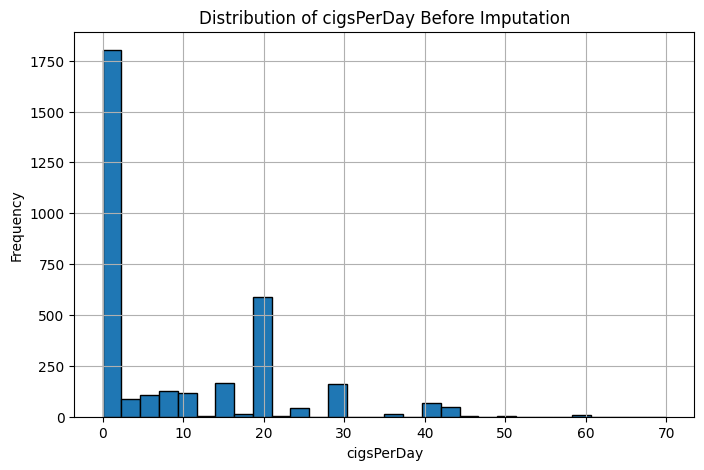

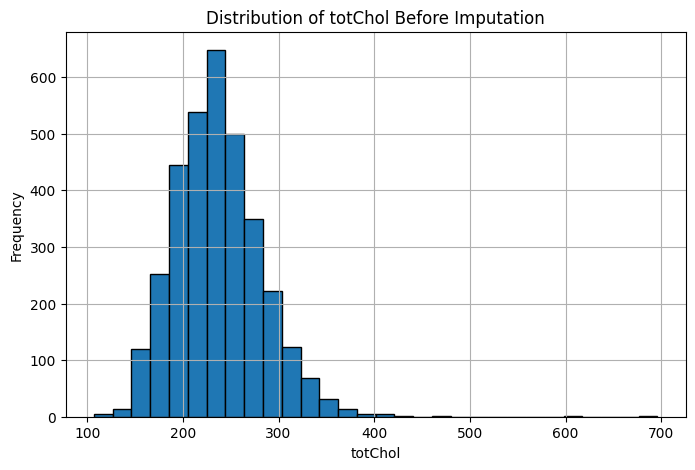

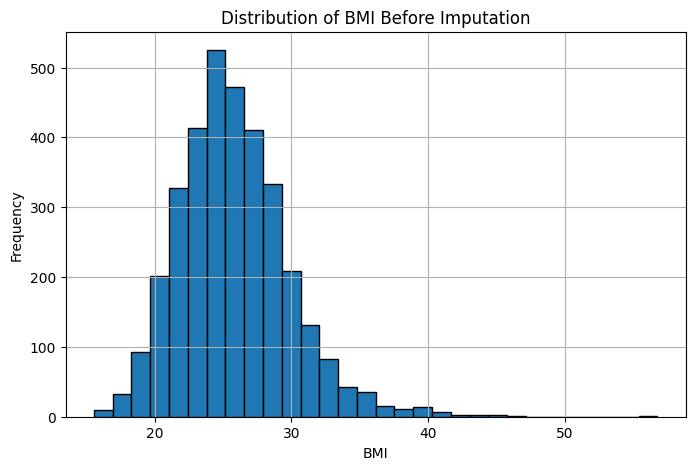

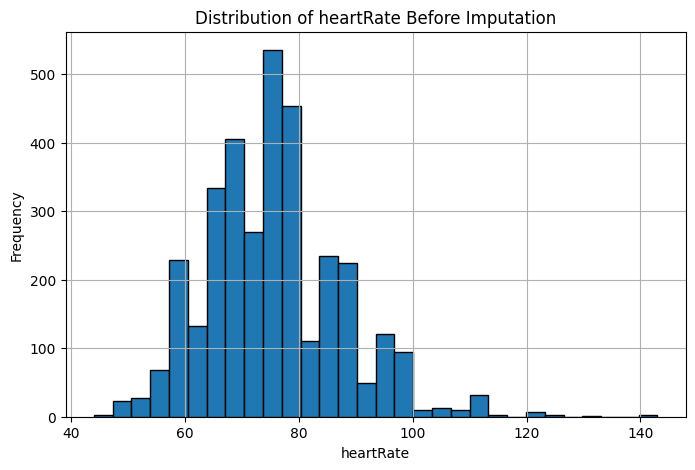

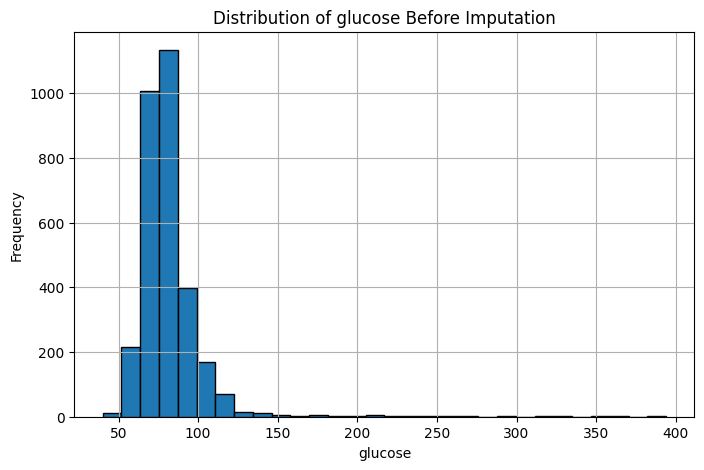

In [199]:
numerical_cols = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    X_train[col].hist(bins=30, edgecolor='k')
    plt.title(f'Distribution of {col} Before Imputation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


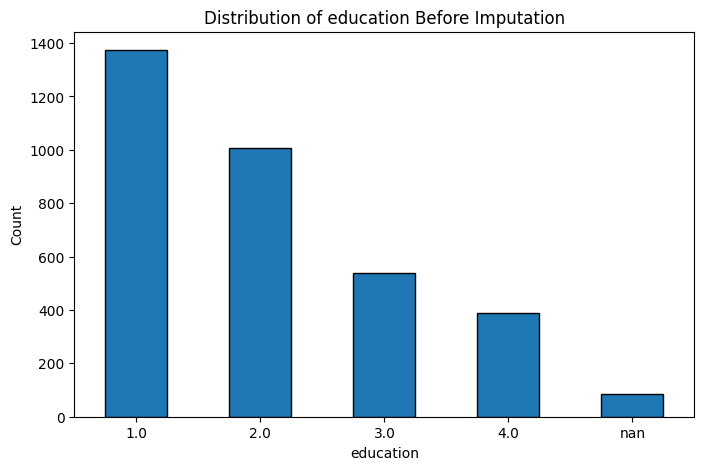

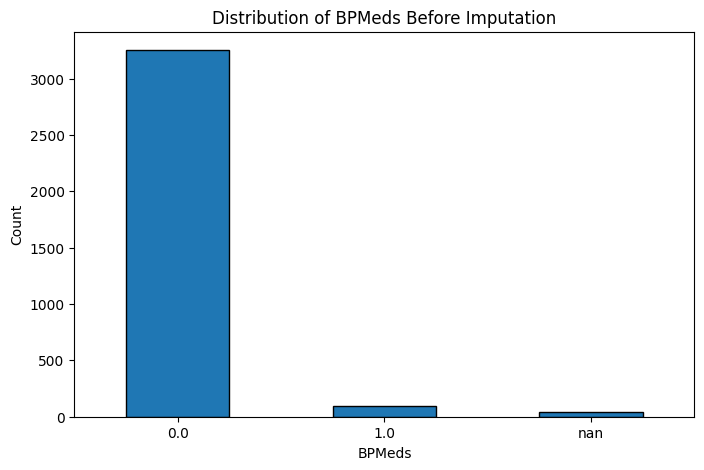

In [200]:
categorical_cols = ['education', 'BPMeds']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    X_train[col].value_counts(dropna=False).sort_index().plot(kind='bar', edgecolor='k')
    plt.title(f'Distribution of {col} Before Imputation')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


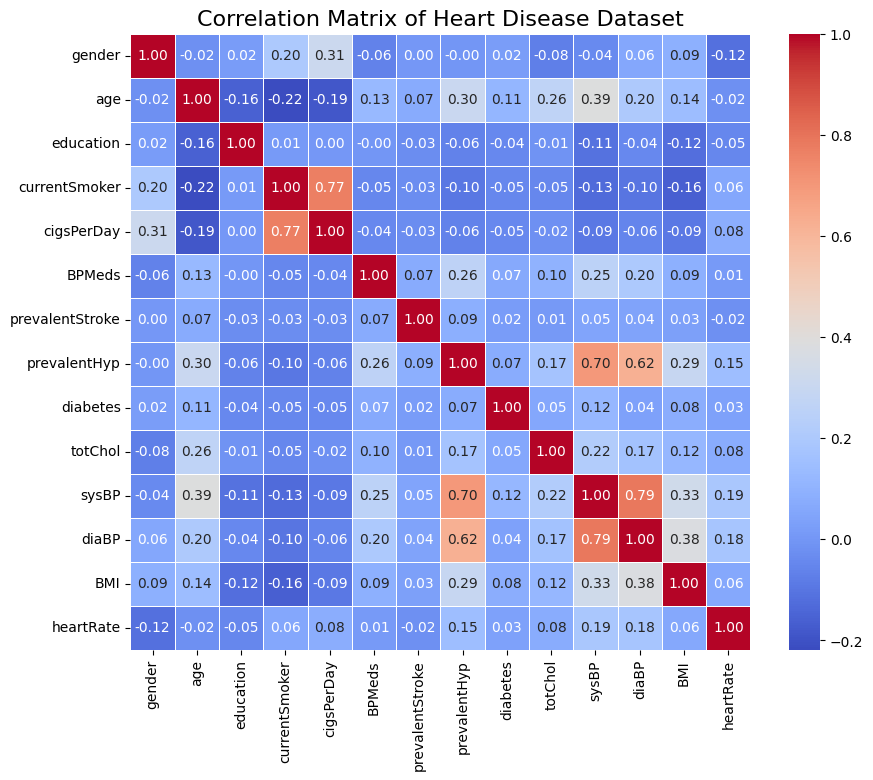

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X_train.iloc[:, :-1].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Heart Disease Dataset", fontsize=16)
plt.show()


In [202]:
# Define age bins and labels
age_bins = [30, 40, 50, 60, 70, 80]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']

X_train['age_group'] = pd.cut(X_train['age'], bins=age_bins, labels=age_labels, right=False)

In [203]:
X_test['age_group'] = pd.cut(X_test['age'], bins=age_bins, labels=age_labels, right=False)

####Impute Missing education Values Within Subclasses (Age, Gender) across different demographics.

Since, education is categorical ordinal variable, we will use mode for null value treatment.


In [204]:
# Check education levels by age group and gender
education_counts = X_train.groupby(['gender', 'age_group'], observed=True)['education'].value_counts(normalize=True)
print(education_counts)


gender  age_group  education
0       30-39      2.0          0.469565
                   3.0          0.221739
                   1.0          0.191304
                   4.0          0.117391
        40-49      2.0          0.352151
                   1.0          0.348118
                   3.0          0.209677
                   4.0          0.090054
        50-59      1.0          0.454392
                   2.0          0.295608
                   3.0          0.182432
                   4.0          0.067568
        60-69      1.0          0.541401
                   2.0          0.235669
                   3.0          0.143312
                   4.0          0.079618
        70-79      1.0          0.500000
                   2.0          0.500000
1       30-39      2.0          0.422886
                   1.0          0.293532
                   4.0          0.179104
                   3.0          0.104478
        40-49      1.0          0.368705
                   2.0      

In [205]:
def impute_mode(series):
    mode = series.mode()
    if not mode.empty:
        return series.fillna(mode[0])
    else:
        return series

X_train['education'] = X_train.groupby(['gender', 'age_group'], observed=True)['education'].transform(impute_mode)


In [206]:
X_test['education'] = X_test.groupby(['gender', 'age_group'], observed=True)['education'].transform(impute_mode)


#### Impute cigsPerDay (Number of Cigarettes per Day) with subclass (currentSmoker, gender, age_group) across different demographics.

cigsPerDay distributions varies across age groups and genders.

In [208]:
# Set 'cigsPerDay' to 0 for non-smokers in training data
X_train.loc[X_train['currentSmoker'] == 0, 'cigsPerDay'] = 0

# For smokers, impute missing values
smokers = X_train['currentSmoker'] == 1
X_train.loc[smokers, 'cigsPerDay'] = X_train.loc[smokers].groupby(['gender', 'age_group'], observed=True)['cigsPerDay'].transform(
    lambda x: x.fillna(x.median())
)


In [209]:
X_test.loc[X_test['currentSmoker'] == 0, 'cigsPerDay'] = 0

# For smokers, impute missing values
test_smokers = X_test['currentSmoker'] == 1
X_test.loc[test_smokers, 'cigsPerDay'] = X_test.loc[test_smokers].groupby(['gender', 'age_group'], observed=True)['cigsPerDay'].transform(
    lambda x: x.fillna(x.median())
)


#### Impute BPMeds values Within Subclasses


Since, people with hypertension (prevalentHyp = 1) are more likely to take blood pressure medication, that's why we are considering prevalentHyp for BPMeds imputation across different demographics (gender, age_group)

In [210]:
X_train['BPMeds'] = X_train.groupby(['prevalentHyp', 'gender', 'age_group'], observed=True)['BPMeds'].transform(impute_mode)


In [211]:
X_test['BPMeds'] = X_test.groupby(['prevalentHyp', 'gender', 'age_group'], observed=True)['BPMeds'].transform(impute_mode)

#### Impute totChol values Within Subclasses across different demographics


Skewness is not in between -0.5 and 0.5,we will use median for imputation


In [212]:
skewness = X_train['totChol'].skew()
print(f"Skewness: {skewness}")


Skewness: 0.9198803304713254


In [213]:
X_train['totChol'] = X_train.groupby(['gender', 'age_group'], observed=True)['totChol'].transform( lambda x: x.fillna(x.median()))

In [214]:
X_test['totChol'] = X_test.groupby(['gender', 'age_group'], observed=True)['totChol'].transform( lambda x: x.fillna(x.median()))

#### Impute BMI values Within Subclasses across different demographics


In [215]:
X_train['BMI'] = X_train.groupby(['gender', 'age_group'], observed=True)['BMI'].transform(lambda x: x.fillna(x.median()))


In [216]:
X_test['BMI'] = X_test.groupby(['gender', 'age_group'], observed=True)['BMI'].transform(lambda x: x.fillna(x.median()))

#### Impute glucose values Within Subclasses across different demographics


In [217]:
skewness = X_train['glucose'].skew()
print(f"Skewness: {skewness}")

Skewness: 6.508729461566254


In [218]:
X_train['glucose'] = X_train.groupby(['diabetes', 'gender', 'age_group'], observed=True)['glucose'].transform(lambda x: x.fillna(x.median()))


In [219]:
X_test['glucose'] = X_test.groupby(['diabetes', 'gender', 'age_group'], observed=True)['glucose'].transform(lambda x: x.fillna(x.median()))

#### Impute Heartrate

Since, there is only 1 missing value in heartrate column, we will simply use median imputation to fill null value

In [220]:
skewness = X_train['heartRate'].skew()
print(f"Skewness: {skewness}")

Skewness: 0.6562809631836425


In [221]:
X_train['heartRate'] = X_train['heartRate'].fillna(X_train['heartRate'].median())

In [222]:
X_train = X_train.drop(columns=['age_group'])

In [223]:
X_train.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [224]:
X_test = X_test.drop(columns=['age_group'])

In [225]:
X_test.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


## Sigmoid function


In [226]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

## Compute the Cost Function and Gradient


In [227]:
def costFunction(weights, X, y):
    """
    Return the logistic regression cost function and gradient
    """
    m = len(y)

    z = np.dot(X, weights)

    # Predicted probabilities using the sigmoid function
    predictions = sigmoid(z)

    # Compute the cost function J
    cost = -1 / m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    # Compute the gradient
    grad = 1 / m * np.dot(X.T, (predictions - y))

    return cost, grad


In [228]:
# Feature normalization function
def featureNormalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [229]:
# Gradient descent function
def gradientDescent(X, y, weights, alpha, iterations):

    cost_history = []

    for i in range(iterations):
        cost, grad = costFunction(weights, X, y)
        weights -= alpha * grad
        cost_history.append(cost)
        print(f"Epoch {i+1}, Cost: {cost:.4f}")

    return weights, cost_history

In [230]:
# Normalize features
X_train, X_mean, X_std = featureNormalization(X_train)
X_test = (X_test - X_mean) / X_std

In [231]:
# Add bias term (intercept) to features
m, n = X_train.shape
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
y_train = y_train.to_numpy().reshape(m, 1)
X_test = np.append(np.ones((X_test.shape[0], 1)), X_test, axis=1)
y_test = y_test.to_numpy().reshape(X_test.shape[0], 1)

In [232]:
# Initialize parameters
initial_weight = np.zeros((X_train.shape[1], 1))

In [233]:
#Compute initial cost and gradient
cost, grad = costFunction(initial_weight, X_train, y_train)
print("Cost of initial weight:", cost)
print("Gradient at initial weight (zeros):", grad.flatten())

Cost of initial weight: 0.6931471805599453
Gradient at initial weight (zeros): [ 0.34778761 -0.03348083 -0.07755023  0.01427232 -0.00817371 -0.01917096
 -0.03671193 -0.02825373 -0.06047718 -0.03076829 -0.0308402  -0.07425456
 -0.04980093 -0.02156058 -0.01018448 -0.03619775]


In [234]:
# Train the logistic regression model
learning_rate = 0.2
iterations = 10
weights, cost_history = gradientDescent(X_train, y_train, initial_weight, learning_rate, iterations)

Epoch 1, Cost: 0.6931
Epoch 2, Cost: 0.6648
Epoch 3, Cost: 0.6400
Epoch 4, Cost: 0.6180
Epoch 5, Cost: 0.5985
Epoch 6, Cost: 0.5811
Epoch 7, Cost: 0.5655
Epoch 8, Cost: 0.5514
Epoch 9, Cost: 0.5387
Epoch 10, Cost: 0.5272


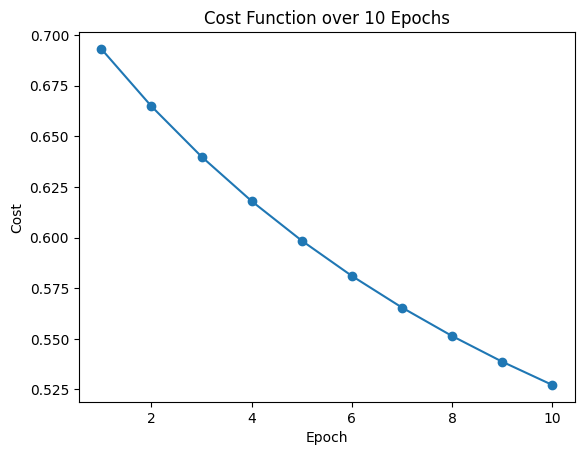

In [235]:
# Plot the cost function over epochs
plt.plot(range(1, iterations+1), cost_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function over 10 Epochs')
plt.show()

In [236]:
# Make predictions
def predict(X, weights, threshold=0.5):
    return (sigmoid(np.dot(X, weights)) >= threshold).astype(int)

y_train_pred = predict(X_train, initial_weight)
y_test_pred = predict(X_test, initial_weight)


In [237]:
# Compute confusion matrix and metrics
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def compute_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    return accuracy, precision, recall

In [238]:
TP_train, TN_train, FP_train, FN_train = confusion_matrix(y_train, y_train_pred)
accuracy_train, precision_train, recall_train = compute_metrics(TP_train, TN_train, FP_train, FN_train)

print(f"Train Confusion Matrix:\nTP: {TP_train}, TN: {TN_train}, FP: {FP_train}, FN: {FN_train}")
print(f"Accuracy: {accuracy_train: .4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")

Train Confusion Matrix:
TP: 61, TN: 2791, FP: 83, FN: 455
Accuracy:  0.8413
Precision: 0.4236
Recall: 0.1182


In [239]:
TP_test, TN_test, FP_test, FN_test = confusion_matrix(y_test, y_test_pred)
accuracy_test, precision_test, recall_test = compute_metrics(TP_test, TN_test, FP_test, FN_test)

print(f"Test Confusion Matrix:\nTP: {TP_test}, TN: {TN_test}, FP: {FP_test}, FN: {FN_test}")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")

Test Confusion Matrix:
TP: 21, TN: 702, FP: 18, FN: 107
Accuracy: 0.8526
Precision: 0.5385
Recall: 0.1641


#### Bonus assignment

In [240]:
# Hyperparameter tuning
learning_rates = [0.0001, 0.001, 0.01,0.02, 0.1, 0.2, 0.5]
num_iterations_list = [10, 50, 100, 200,300, 350, 400,500, 700, 1000]

best_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0}
best_params = {}

# Loop through different hyperparameters
for learning_rate in learning_rates:
    for num_iterations in num_iterations_list:
        print(f"Training with Learning Rate: {learning_rate}, Iterations: {num_iterations}")

        # Reinitialize weights
        initial_weight = np.zeros((X_train.shape[1], 1))

        # Logistic regression model training
        weights, cost_history = gradientDescent(X_train, y_train, initial_weight, learning_rate, num_iterations)

        # Predictions
        y_train_pred = predict(X_train, weights)
        y_test_pred = predict(X_test, weights)

        # Compute metrics for train and test
        TP_train, TN_train, FP_train, FN_train = confusion_matrix(y_train, y_train_pred)
        accuracy_train, precision_train, recall_train = compute_metrics(TP_train, TN_train, FP_train, FN_train)

        TP_test, TN_test, FP_test, FN_test = confusion_matrix(y_test, y_test_pred)
        accuracy_test, precision_test, recall_test = compute_metrics(TP_test, TN_test, FP_test, FN_test)

        # Metrics
        print(f"Test Metrics: Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}\n")

        # Best metrics and parameters
        if accuracy_test > best_metrics['accuracy']:
            best_metrics = {
                'accuracy': accuracy_test,
                'precision': precision_test,
                'recall': recall_test
            }
            best_params = {
                'learning_rate': learning_rate,
                'num_iterations': num_iterations
            }

# Best hyperparameters and metrics
print("Best Hyperparameters:")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Number of Iterations: {best_params['num_iterations']}")
print("\nBest Test Metrics:")
print(f"Accuracy with best hyperparameters: {best_metrics['accuracy']:.4f}")
print(f"Precision with best hyperparameters: {best_metrics['precision']:.4f}")
print(f"Recall with best hyperparameters: {best_metrics['recall']:.4f}")


Streaming output truncated to the last 5000 lines.
Epoch 354, Cost: 0.3822
Epoch 355, Cost: 0.3822
Epoch 356, Cost: 0.3822
Epoch 357, Cost: 0.3822
Epoch 358, Cost: 0.3822
Epoch 359, Cost: 0.3822
Epoch 360, Cost: 0.3822
Epoch 361, Cost: 0.3822
Epoch 362, Cost: 0.3822
Epoch 363, Cost: 0.3822
Epoch 364, Cost: 0.3822
Epoch 365, Cost: 0.3822
Epoch 366, Cost: 0.3822
Epoch 367, Cost: 0.3822
Epoch 368, Cost: 0.3822
Epoch 369, Cost: 0.3822
Epoch 370, Cost: 0.3822
Epoch 371, Cost: 0.3822
Epoch 372, Cost: 0.3822
Epoch 373, Cost: 0.3822
Epoch 374, Cost: 0.3822
Epoch 375, Cost: 0.3822
Epoch 376, Cost: 0.3822
Epoch 377, Cost: 0.3822
Epoch 378, Cost: 0.3822
Epoch 379, Cost: 0.3822
Epoch 380, Cost: 0.3822
Epoch 381, Cost: 0.3822
Epoch 382, Cost: 0.3822
Epoch 383, Cost: 0.3822
Epoch 384, Cost: 0.3822
Epoch 385, Cost: 0.3822
Epoch 386, Cost: 0.3822
Epoch 387, Cost: 0.3822
Epoch 388, Cost: 0.3822
Epoch 389, Cost: 0.3822
Epoch 390, Cost: 0.3822
Epoch 391, Cost: 0.3822
Epoch 392, Cost: 0.3822
Epoch 393, Co

After experimenting with different iteration size and Learning rate, received the best results with 0.01 learning rate and 300 iterations of 0.8573 accuracy, 0.6207 precision,and 0.1406 recall

In [241]:
# Train the model using the best hyperparameters
best_learning_rate = best_params['learning_rate']
best_num_iterations = best_params['num_iterations']

print(f"Training with Best Hyperparameters: Learning Rate = {best_learning_rate}, Iterations = {best_num_iterations}")

# Reinitialize weights
initial_weight = np.zeros((X_train.shape[1], 1))

Training with Best Hyperparameters: Learning Rate = 0.01, Iterations = 300


In [242]:
# Train the logistic regression model using the best hyperparameters
weights, cost_history = gradientDescent(X_train, y_train, initial_weight, best_learning_rate, best_num_iterations)

Epoch 1, Cost: 0.6931
Epoch 2, Cost: 0.6917
Epoch 3, Cost: 0.6902
Epoch 4, Cost: 0.6888
Epoch 5, Cost: 0.6874
Epoch 6, Cost: 0.6859
Epoch 7, Cost: 0.6845
Epoch 8, Cost: 0.6831
Epoch 9, Cost: 0.6817
Epoch 10, Cost: 0.6803
Epoch 11, Cost: 0.6790
Epoch 12, Cost: 0.6776
Epoch 13, Cost: 0.6762
Epoch 14, Cost: 0.6749
Epoch 15, Cost: 0.6735
Epoch 16, Cost: 0.6722
Epoch 17, Cost: 0.6709
Epoch 18, Cost: 0.6695
Epoch 19, Cost: 0.6682
Epoch 20, Cost: 0.6669
Epoch 21, Cost: 0.6656
Epoch 22, Cost: 0.6643
Epoch 23, Cost: 0.6631
Epoch 24, Cost: 0.6618
Epoch 25, Cost: 0.6605
Epoch 26, Cost: 0.6593
Epoch 27, Cost: 0.6580
Epoch 28, Cost: 0.6568
Epoch 29, Cost: 0.6556
Epoch 30, Cost: 0.6543
Epoch 31, Cost: 0.6531
Epoch 32, Cost: 0.6519
Epoch 33, Cost: 0.6507
Epoch 34, Cost: 0.6495
Epoch 35, Cost: 0.6483
Epoch 36, Cost: 0.6471
Epoch 37, Cost: 0.6460
Epoch 38, Cost: 0.6448
Epoch 39, Cost: 0.6436
Epoch 40, Cost: 0.6425
Epoch 41, Cost: 0.6413
Epoch 42, Cost: 0.6402
Epoch 43, Cost: 0.6391
Epoch 44, Cost: 0.63

In [243]:
# Compute ROC curve points and AUC
def compute_roc_auc(y_true, y_probabilities):

    thresholds = np.linspace(0, 1, 100)
    tpr = []
    fpr = []

    for threshold in thresholds:
        y_pred = (y_probabilities >= threshold).astype(int)
        TP, TN, FP, FN = confusion_matrix(y_true, y_pred)

        # Compute TPR and FPR
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate
        tpr.append(TPR)
        fpr.append(FPR)

    sorted_indices = np.argsort(fpr)
    fpr = np.array(fpr)[sorted_indices]
    tpr = np.array(tpr)[sorted_indices]

    # Calculate AUC
    auc = 0
    for i in range(1, len(fpr)):
        auc += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2

    return tpr, fpr, auc


In [244]:
# Compute ROC and AUC for train dataset
y_train_probabilities = sigmoid(np.dot(X_train, weights)).flatten()  # Predicted probabilities for train
tpr_train, fpr_train, auc_train = compute_roc_auc(y_train.flatten(), y_train_probabilities)

print(f"Train AUC: {auc_train:.4f}")

Train AUC: 0.7154


In [245]:
# Compute ROC and AUC for test dataset
y_test_probabilities = sigmoid(np.dot(X_test, weights)).flatten()  # Predicted probabilities for test
tpr_test, fpr_test, auc_test = compute_roc_auc(y_test.flatten(), y_test_probabilities)

print(f"Test AUC: {auc_test:.4f}")

Test AUC: 0.7505


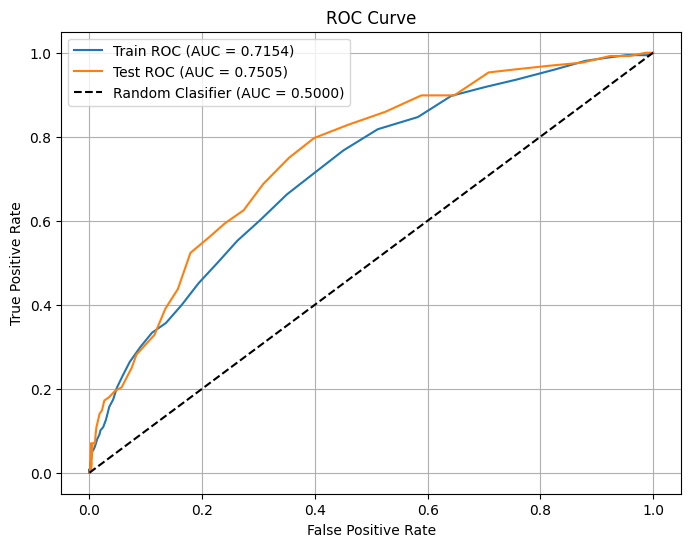

In [246]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.4f})")
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Clasifier (AUC = 0.5000)")  # Base model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()